# <font color = 'shade'>**Import/Install the packages**

In [1]:
if 'google.colab' in str(get_ipython()):
    print('Running on Colab')
else:
    print('Not Running on Colab')

Running on Colab


In [2]:
if 'google.colab' in str(get_ipython()):
  !pip install --upgrade feature_engine scikit-learn -q
  from google.colab import drive
  drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 38.1 MB/s eta 0:00:00
Mounted at /content/drive


In [3]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.4.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, feature-engine, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [4]:
!pip show feature_engine

Name: feature-engine
Version: 1.6.2
Summary: Feature engineering package with Scikit-learn's fit transform functionality
Home-page: http://github.com/feature-engine/feature_engine
Author: Soledad Galli
Author-email: solegalli@protonmail.com
License: BSD 3 clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, pandas, scikit-learn, scipy, statsmodels
Required-by: 


In [5]:
"""Importing the required packages"""

# For DataFrames and manipulations
import pandas as pd
import numpy as np

# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# Pathlib to navigate file system
from pathlib import Path
import sys

# For categorical variables
from feature_engine.encoding import OneHotEncoder

# For scaling the data
from sklearn.preprocessing import StandardScaler

# feature engine log transformation
from feature_engine.transformation import LogTransformer

# feature engine wrapper
from feature_engine.wrappers import SklearnTransformerWrapper

# <font color = 'shade'> **Specify Project Folder Location**

In [6]:
if 'google.colab' in str(get_ipython()):
    base_folder = Path('/content/drive/MyDrive/AML')

In [7]:
data_folder = base_folder/'data'

# <font color = 'shade'> **Import Custom Functions from Python file**

In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython']

In [70]:
def diagnostic_plots(df, variable):
    """
    Generate diagnostic plots for a given variable.

    Parameters:
    - df (pd.DataFrame): The input data frame containing the variable.
    - variable (str): The name of the variable for which to create the diagnostic plots.

    This function generates three diagnostic plots:
    1. Histogram for distribution visualization.
    2. Boxplot for outlier detection.
    3. Q-Q plot for normality assessment.
    """

    # Create a new figure for plotting
    plt.figure(figsize=(16, 4))

    # First subplot: Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df, x=variable, bins=30)
    plt.title('Histogram')

    # Second subplot: Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    # Third subplot: Q-Q plot
    plt.subplot(1, 3, 3)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title('Q-Q plot')

    # Show all the subplots
    plt.show()

# <font color = 'shade'> **Cab_Data Dataset**

In [10]:
file = data_folder / 'Cab_Data.csv'

In [11]:
try:
    Cab_Data = pd.read_csv(file)
except UnicodeDecodeError:
    Cab_Data = pd.read_csv(file, encoding='latin1')

# <font color = 'shade'>**Exploratory data analysis**

## <font color = 'shade'>**Check Data**
Let's explore about the dataset by checking the shape(number of rows and columns), different column labels, duplicate values etc.

### <font color = 'shade'>**Check few rows**

In [16]:
# check the top 5 rows
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-16,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-16,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-16,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-16,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-16,Pink Cab,ATLANTA GA,8.73,114.62,97.776


###  <font color = 'shade'>**Check column names**

In [17]:
# Let's check the columns of the data
Cab_Data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

### <font color = 'shade'>**Check data types of columns**

In [18]:
# check the data type for the columns
Cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


### <font color = 'shade'>**Check for unique values**

Now, let's see total number of unique values in each column.

In [19]:
Cab_Data.nunique()

Transaction ID    359392
Date of Travel      1095
Company                2
City                  19
KM Travelled         874
Price Charged      99176
Cost of Trip       16291
dtype: int64

As we can see, all the columns has more than one unique value.

So, all these are valid and useful columns.

### <font color = 'shade'>**Check summary statistics**

In [20]:
# We will use describe function and then take the transpose for better visualization
Cab_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20


### <font color = 'shade'>**Check for duplicate rows**

In [21]:
# To check the duplicates of the data
dups = Cab_Data.duplicated()
# report if there are any duplicates
print(dups.any())


False


From the given results, we can check that there are no duplicates in our data.

## <font color = 'shade'>**Quantifying Missing Data**

Now, let's check is there any missing values in our dataframe.

In [22]:
# check missing values in data
Cab_Data.isna()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
359387,False,False,False,False,False,False,False
359388,False,False,False,False,False,False,False
359389,False,False,False,False,False,False,False
359390,False,False,False,False,False,False,False


In [23]:
# calculate % of mssing values for each column
Cab_Data.isna().mean()*100

Transaction ID    0.0
Date of Travel    0.0
Company           0.0
City              0.0
KM Travelled      0.0
Price Charged     0.0
Cost of Trip      0.0
dtype: float64

<font color ='indianred'>**There are no missing values in the dataset.**

## <font color = 'shade'>**Identify numerical, categorical and discrete variables**
Since EDA steps can be different depending on type of variables. Let us first create list of different type of variables.

In [29]:
# Create a list of categorical variables
categorical = [var for var in Cab_Data.columns if Cab_Data[var].dtype == 'O']

# Create a list of continuous Variables
continuous = [
    var for var in Cab_Data.columns if Cab_Data[var].dtype != 'O'
]

In [30]:
# check continous Variables
continuous

['Transaction ID', 'KM Travelled', 'Price Charged', 'Cost of Trip']

In [31]:
# check categorical variables
categorical

['Date of Travel', 'Company', 'City']

## <font color = 'shade'>**Check Variable Distributions**

### <font color = 'shade'>**Distribution of continuous and discrete variables**

We can use histograms, Q-Q plots, and Boxplots to check the distribution of continuous variables.

We created this function in last lecture. We have added this function in python file eda_plots. We have imorted the function and will use it now.

#### <font color = 'shade'>**Distribution of continuous variables**

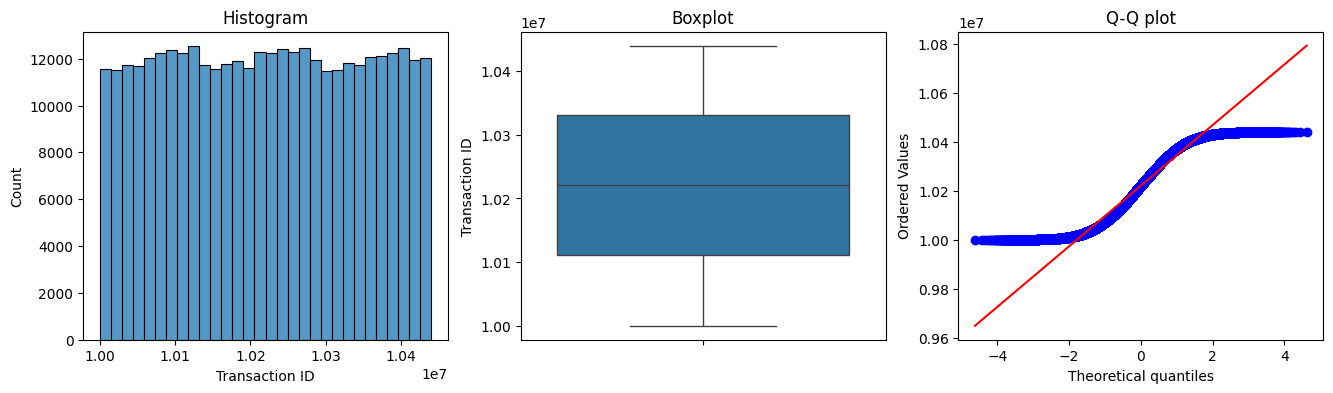

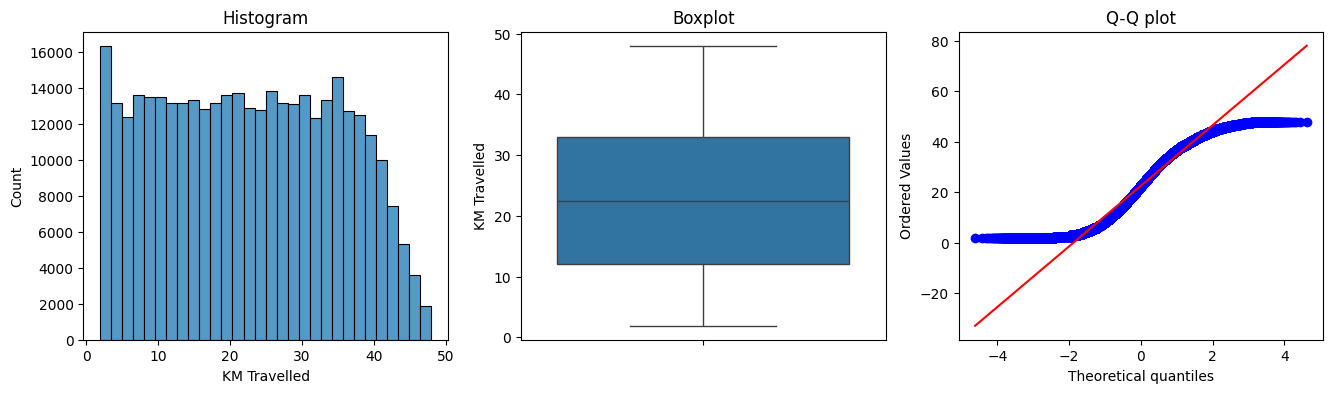

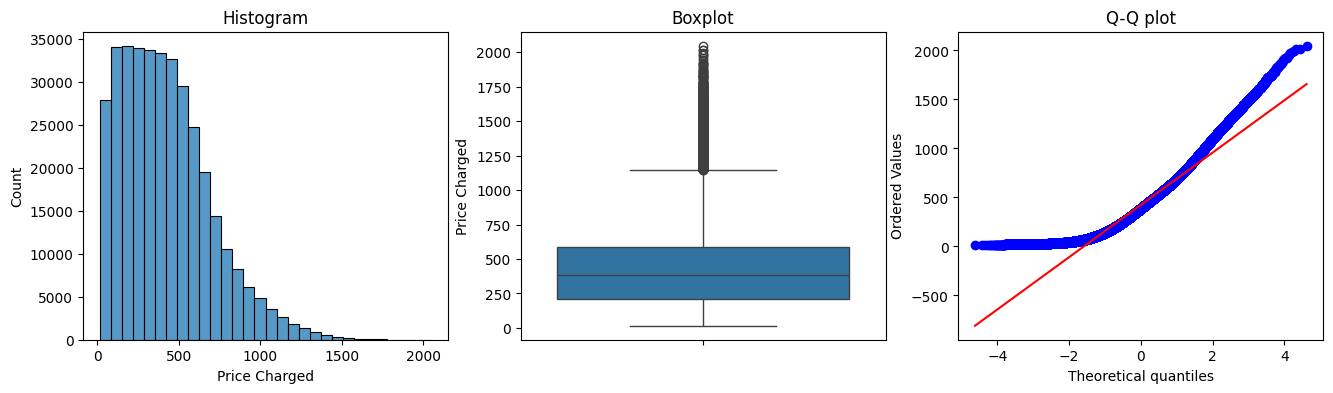

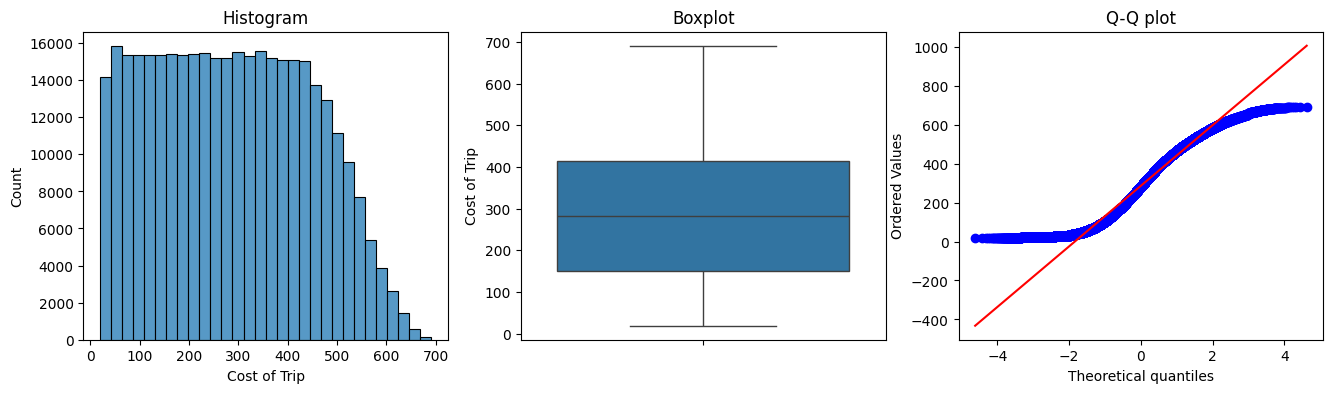

In [36]:
for var in continuous:
    diagnostic_plots(Cab_Data, var)

## <font color = 'shade'>**Visualizing Relationships between variables**

### <font color = 'shade'>**Correlation Matrix**

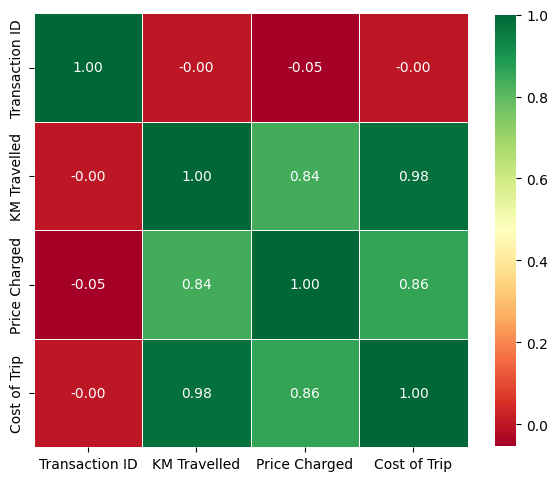

In [37]:
# We can check the correlation between every pair of attributes
# The correlation will be generated for the numerical data only
# we will use df.corr() to get correlatons and then use sns.heatmap to print the correlation matriCab_Data
corrmat = Cab_Data[continuous].corr().round(2)
top_corr_features = corrmat.index
plt.figure(figsize=(7, 7))
sns.heatmap(Cab_Data[top_corr_features].corr(),annot=True, square=True, fmt='.2f',
            cbar_kws={"shrink": .80}, linewidths=.5, cmap='RdYlGn');

* There is high correaltion between variables.

# <font color = 'shade'> **City Dataset**

In [38]:
file = data_folder / 'City.csv'

In [39]:
try:
    City = pd.read_csv(file)
except UnicodeDecodeError:
    City = pd.read_csv(file, encoding='latin1')

# <font color = 'shade'>**Exploratory data analysis**

## <font color = 'shade'>**Check Data**
Let's explore about the dataset by checking the shape(number of rows and columns), different column labels, duplicate values etc.

### <font color = 'shade'>**Check few rows**

In [40]:
# check the top 5 rows
City.head()

,City,Population,Users
0,NEW YORK NY,8405837.0,302149.0
1,CHICAGO IL,1955130.0,164468.0
2,LOS ANGELES CA,1595037.0,144132.0
3,MIAMI FL,1339155.0,17675.0
4,SILICON VALLEY,1177609.0,27247.0


###  <font color = 'shade'>**Check column names**

In [41]:
# Let's check the columns of the data
City.columns

Index(['City', 'Population', 'Users'], dtype='object')

### <font color = 'shade'>**Check data types of columns**

In [42]:
# check the data type for the columns
City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


### <font color = 'shade'>**Check for unique values**

Now, let's see total number of unique values in each column.

In [43]:
City.nunique()

City          20
Population    20
Users         20
dtype: int64

As we can see, all the columns has more than one unique value.

So, all these are valid and useful columns.

### <font color = 'shade'>**Check summary statistics**

In [44]:
# We will use describe function and then take the transpose for better visualization
City.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,20.0,1231592.00,1.740127e+06,248968.0,608637.25,784559.0,1067041.0,8405837.0
Users,20.0,64520.65,8.349938e+04,3643.0,11633.25,23429.0,91766.0,302149.0


### <font color = 'shade'>**Check for duplicate rows**

In [45]:
# To check the duplicates of the data
dups = City.duplicated()
# report if there are any duplicates
print(dups.any())


False


From the given results, we can check that there are no duplicates in our data.

## <font color = 'shade'>**Quantifying Missing Data**

Now, let's check is there any missing values in our dataframe.

In [46]:
# check missing values in data
City.isna()

,City,Population,Users
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [47]:
# calculate % of mssing values for each column
City.isna().mean()*100

City          0.0
Population    0.0
Users         0.0
dtype: float64

<font color ='indianred'>**There are no missing values in the dataset.**

## <font color = 'shade'>**Identify numerical, categorical and discrete variables**
Since EDA steps can be different depending on type of variables. Let us first create list of different type of variables.

In [48]:
# Create a list of categorical variables
categorical = [var for var in City.columns if City[var].dtype == 'O']

# Create a list of continuous Variables
continuous = [
    var for var in City.columns if City[var].dtype != 'O'
]

In [49]:
# check continous Variables
continuous

['Population', 'Users']

In [50]:
# check categorical variables
categorical

['City']

## <font color = 'shade'>**Check Variable Distributions**

### <font color = 'shade'>**Distribution of continuous and discrete variables**

We can use histograms, Q-Q plots, and Boxplots to check the distribution of continuous variables.

We created this function in last lecture. We have added this function in python file eda_plots. We have imorted the function and will use it now.

#### <font color = 'shade'>**Distribution of continuous variables**

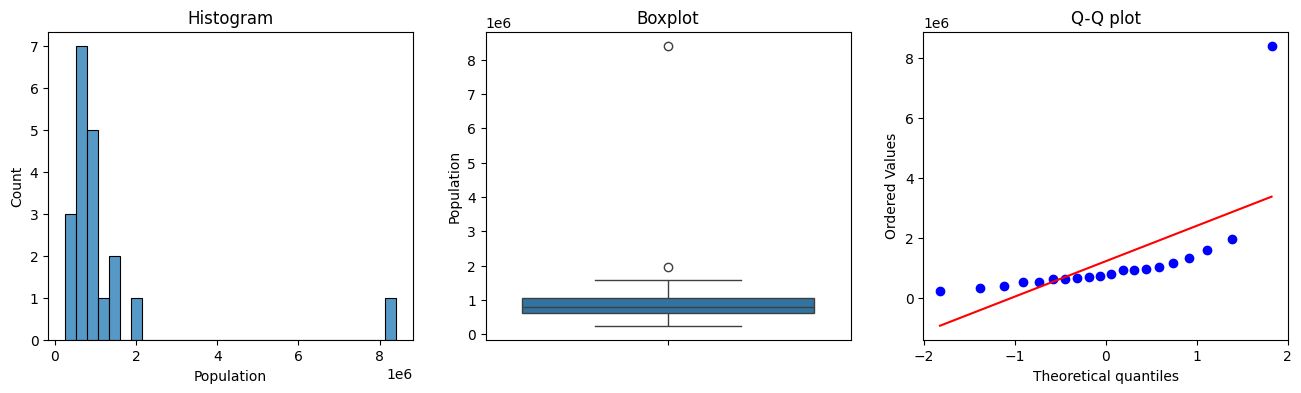

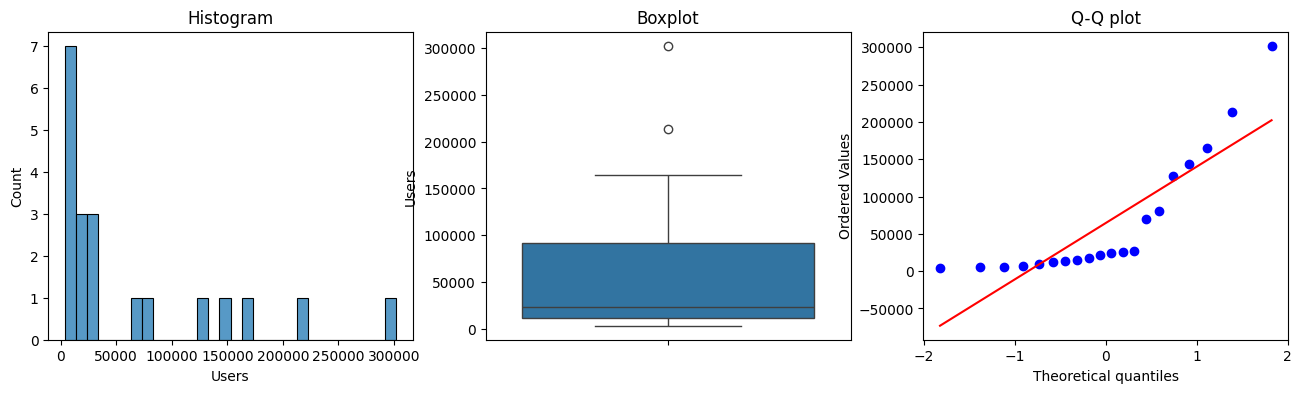

In [52]:
for var in continuous:
    diagnostic_plots(City, var)

## <font color = 'shade'>**Visualizing Relationships between variables**

### <font color = 'shade'>**Correlation Matrix**

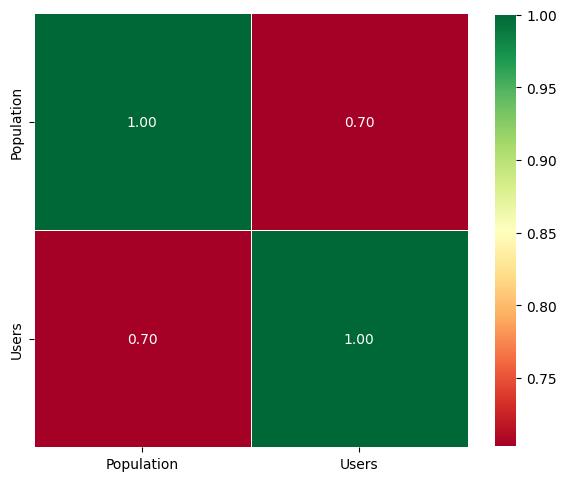

In [53]:
# We can check the correlation between every pair of attributes
# The correlation will be generated for the numerical data only
# we will use df.corr() to get correlatons and then use sns.heatmap to print the correlation matriCab_Data
corrmat = City[continuous].corr().round(2)
top_corr_features = corrmat.index
plt.figure(figsize=(7, 7))
sns.heatmap(City[top_corr_features].corr(),annot=True, square=True, fmt='.2f',
            cbar_kws={"shrink": .80}, linewidths=.5, cmap='RdYlGn');

* There is high correaltion between variables.

# <font color = 'shade'> **Customer_ID Dataset**

In [54]:
file = data_folder / 'Customer_ID.csv'

In [55]:
try:
    Customer_ID = pd.read_csv(file)
except UnicodeDecodeError:
    Customer_ID = pd.read_csv(file, encoding='latin1')

# <font color = 'shade'>**Exploratory data analysis**

## <font color = 'shade'>**Check Data**
Let's explore about the dataset by checking the shape(number of rows and columns), different column labels, duplicate values etc.

### <font color = 'shade'>**Check few rows**

In [56]:
# check the top 5 rows
Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


###  <font color = 'shade'>**Check column names**

In [57]:
# Let's check the columns of the data
Customer_ID.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

### <font color = 'shade'>**Check data types of columns**

In [58]:
# check the data type for the columns
Customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### <font color = 'shade'>**Check for unique values**

Now, let's see total number of unique values in each column.

In [59]:
Customer_ID.nunique()

Customer ID           49171
Gender                    2
Age                      48
Income (USD/Month)    23341
dtype: int64

As we can see, all the columns has more than one unique value.

So, all these are valid and useful columns.

### <font color = 'shade'>**Check summary statistics**

In [60]:
# We will use describe function and then take the transpose for better visualization
Customer_ID.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,49171.0,28398.252283,17714.137333,1.0,12654.5,27631.0,43284.5,60000.0
Age,49171.0,35.363121,12.599066,18.0,25.0,33.0,42.0,65.0
Income (USD/Month),49171.0,15015.631856,8002.208253,2000.0,8289.5,14656.0,21035.0,35000.0


### <font color = 'shade'>**Check for duplicate rows**

In [61]:
# To check the duplicates of the data
dups = Customer_ID.duplicated()
# report if there are any duplicates
print(dups.any())

False


From the given results, we can check that there are no duplicates in our data.

## <font color = 'shade'>**Quantifying Missing Data**

Now, let's check is there any missing values in our dataframe.

In [62]:
# check missing values in data
Customer_ID.isna()

,Customer ID,Gender,Age,Income (USD/Month)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
49166,False,False,False,False
49167,False,False,False,False
49168,False,False,False,False
49169,False,False,False,False


In [63]:
# calculate % of mssing values for each column
Customer_ID.isna().mean()*100

Customer ID           0.0
Gender                0.0
Age                   0.0
Income (USD/Month)    0.0
dtype: float64

<font color ='indianred'>**There are no missing values in the dataset.**

## <font color = 'shade'>**Identify numerical, categorical and discrete variables**
Since EDA steps can be different depending on type of variables. Let us first create list of different type of variables.

In [64]:
# Create a list of categorical variables
categorical = [var for var in Customer_ID.columns if Customer_ID[var].dtype == 'O']

# Create a list of continuous Variables
continuous = [
    var for var in Customer_ID.columns if Customer_ID[var].dtype != 'O'
]

In [65]:
# check continous Variables
continuous

['Customer ID', 'Age', 'Income (USD/Month)']

In [66]:
# check categorical variables
categorical

['Gender']

## <font color = 'shade'>**Check Variable Distributions**

### <font color = 'shade'>**Distribution of continuous and discrete variables**

We can use histograms, Q-Q plots, and Boxplots to check the distribution of continuous variables.

We created this function in last lecture. We have added this function in python file eda_plots. We have imorted the function and will use it now.

#### <font color = 'shade'>**Distribution of continuous variables**

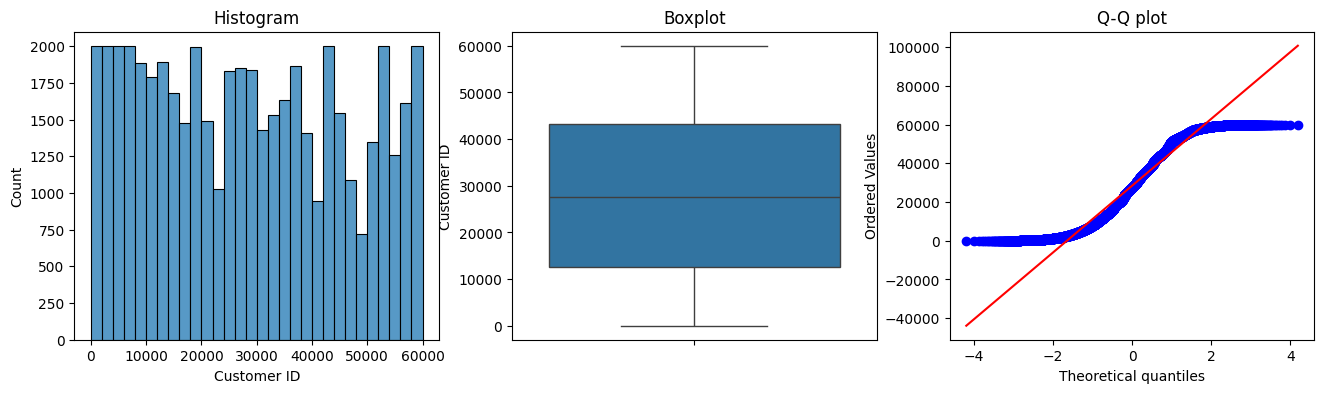

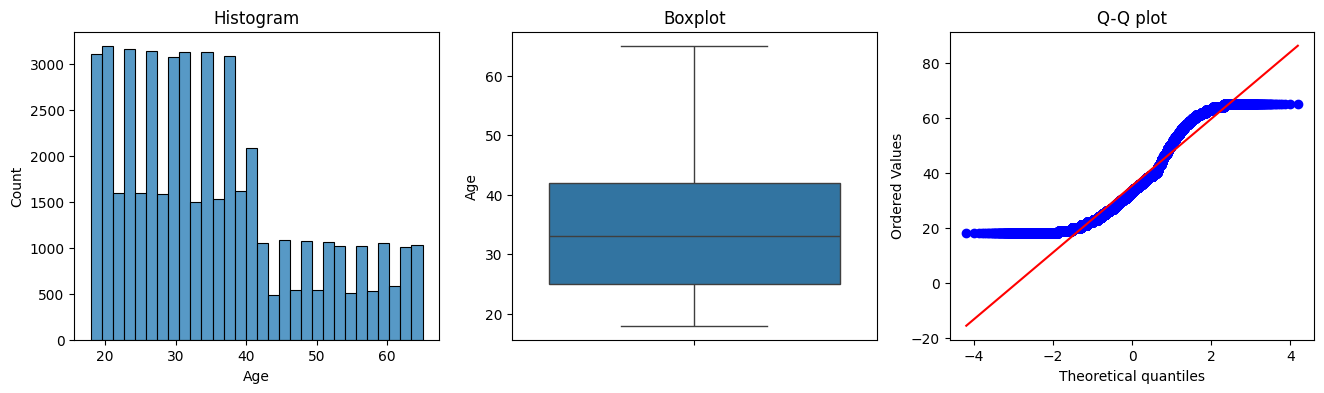

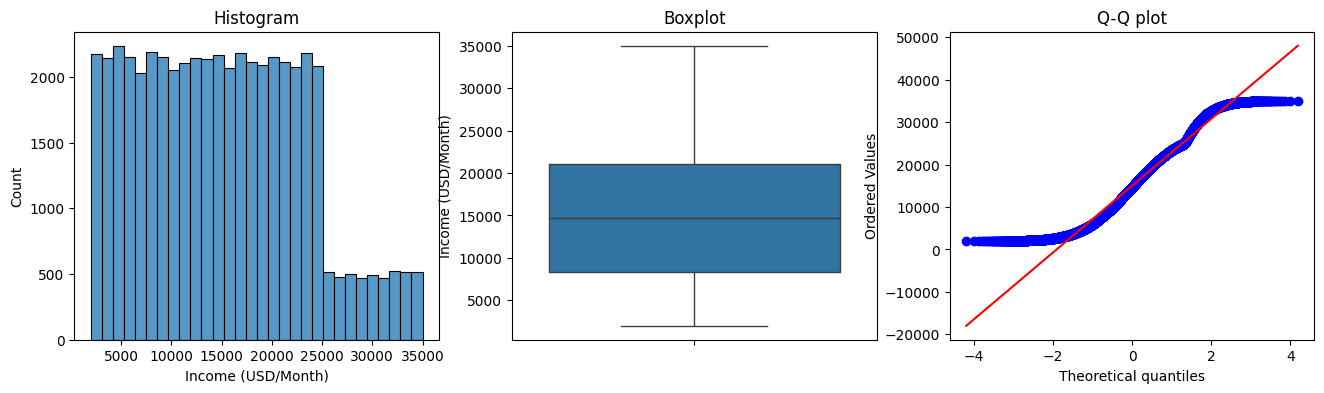

In [68]:
for var in continuous:
    diagnostic_plots(Customer_ID, var)

## <font color = 'shade'>**Visualizing Relationships between variables**

### <font color = 'shade'>**Correlation Matrix**

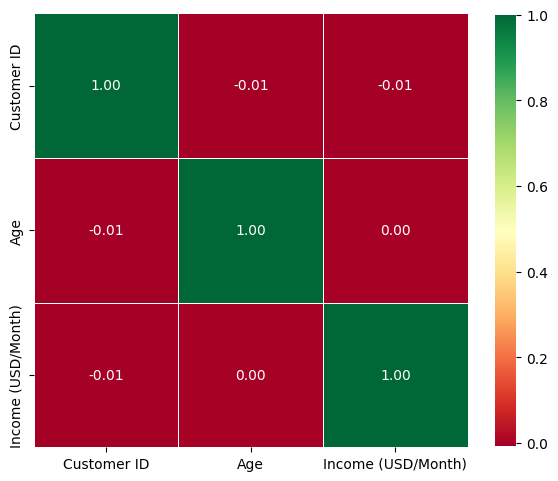

In [69]:
# We can check the correlation between every pair of attributes
# The correlation will be generated for the numerical data only
# we will use df.corr() to get correlatons and then use sns.heatmap to print the correlation matriCab_Data
corrmat = Customer_ID[continuous].corr().round(2)
top_corr_features = corrmat.index
plt.figure(figsize=(7, 7))
sns.heatmap(Customer_ID[top_corr_features].corr(),annot=True, square=True, fmt='.2f',
            cbar_kws={"shrink": .80}, linewidths=.5, cmap='RdYlGn');

* There is low correaltion between variables.

# <font color = 'shade'> **Transaction_ID Dataset**

In [71]:
file = data_folder / 'Transaction_ID.csv'

In [72]:
try:
    Transaction_ID = pd.read_csv(file)
except UnicodeDecodeError:
    Transaction_ID = pd.read_csv(file, encoding='latin1')

# <font color = 'shade'>**Exploratory data analysis**

## <font color = 'shade'>**Check Data**
Let's explore about the dataset by checking the shape(number of rows and columns), different column labels, duplicate values etc.

### <font color = 'shade'>**Check few rows**

In [73]:
# check the top 5 rows
Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


###  <font color = 'shade'>**Check column names**

In [74]:
# Let's check the columns of the data
Transaction_ID.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')

### <font color = 'shade'>**Check data types of columns**

In [75]:
# check the data type for the columns
Transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


### <font color = 'shade'>**Check for unique values**

Now, let's see total number of unique values in each column.

In [76]:
Transaction_ID.nunique()

Transaction ID    440098
Customer ID        49171
Payment_Mode           2
dtype: int64

As we can see, all the columns has more than one unique value.

So, all these are valid and useful columns.

### <font color = 'shade'>**Check summary statistics**

In [77]:
# We will use describe function and then take the transpose for better visualization
Transaction_ID.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,440098.0,1.022006e+07,127045.493722,10000011.0,10110035.25,10220059.5,10330083.75,10440108.0
Customer ID,440098.0,2.361951e+04,21195.549816,1.0,3530.00,15168.0,43884.00,60000.0


### <font color = 'shade'>**Check for duplicate rows**

In [78]:
# To check the duplicates of the data
dups = Transaction_ID.duplicated()
# report if there are any duplicates
print(dups.any())


False


From the given results, we can check that there are no duplicates in our data.

## <font color = 'shade'>**Quantifying Missing Data**

Now, let's check is there any missing values in our dataframe.

In [79]:
# check missing values in data
Transaction_ID.isna()

,Transaction ID,Customer ID,Payment_Mode
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
440093,False,False,False
440094,False,False,False
440095,False,False,False
440096,False,False,False


In [80]:
# calculate % of mssing values for each column
Transaction_ID.isna().mean()*100

Transaction ID    0.0
Customer ID       0.0
Payment_Mode      0.0
dtype: float64

<font color ='indianred'>**There are no missing values in the dataset.**

## <font color = 'shade'>**Identify numerical, categorical and discrete variables**
Since EDA steps can be different depending on type of variables. Let us first create list of different type of variables.

In [81]:
# Create a list of categorical variables
categorical = [var for var in Transaction_ID.columns if Transaction_ID[var].dtype == 'O']

# Create a list of continuous Variables
continuous = [
    var for var in Transaction_ID.columns if Transaction_ID[var].dtype != 'O'
]

In [82]:
# check continous Variables
continuous

['Transaction ID', 'Customer ID']

In [83]:
# check categorical variables
categorical

['Payment_Mode']

## <font color = 'shade'>**Check Variable Distributions**

### <font color = 'shade'>**Distribution of continuous and discrete variables**

We can use histograms, Q-Q plots, and Boxplots to check the distribution of continuous variables.

We created this function in last lecture. We have added this function in python file eda_plots. We have imorted the function and will use it now.

#### <font color = 'shade'>**Distribution of continuous variables**

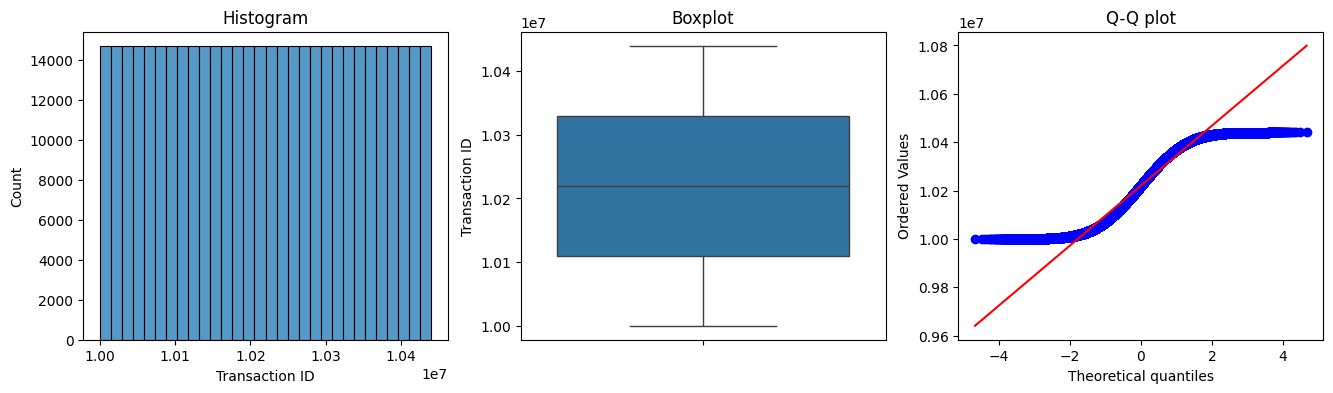

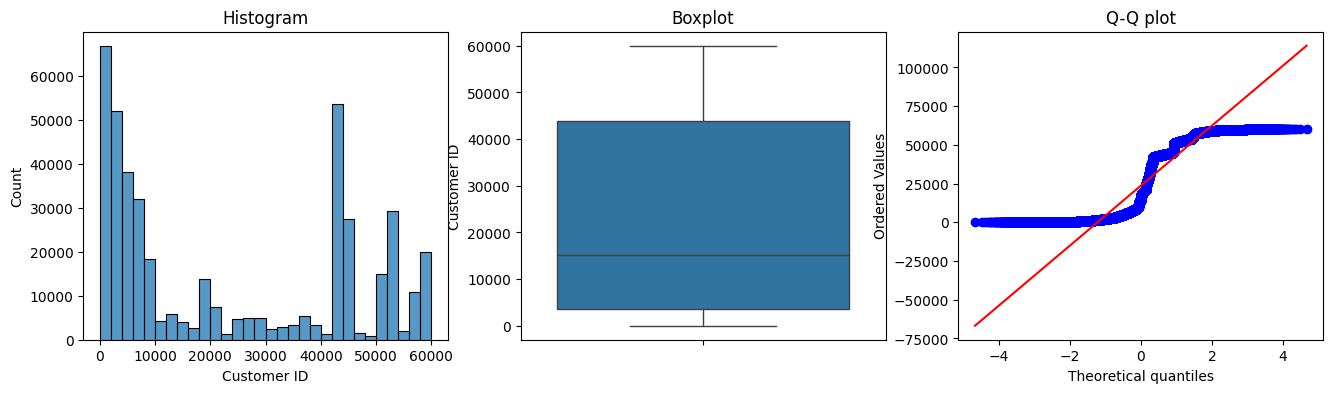

In [84]:
for var in continuous:
    diagnostic_plots(Transaction_ID, var)